In [2]:
import imageio                                          #Se importan las librecias a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
M_YIQ = np.array([[0.299   , 0.587    ,     0.114],    #Se cargan las matrices de convesion
                  [0.595716, -0.274453, -0.321263],    # RGB a YIQ
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563 ,  0.6210],               # YIQ a RGB
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):                              # Funcion que reacomoda el formato
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):                                      # Funcion que aplica la conversion rga a yiq
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):                                      # Funcion que aplica la conversion yiq a rgb
    return apply_matrix(img, M_RGB)

(424, 564, 3)
(424, 564, 3)


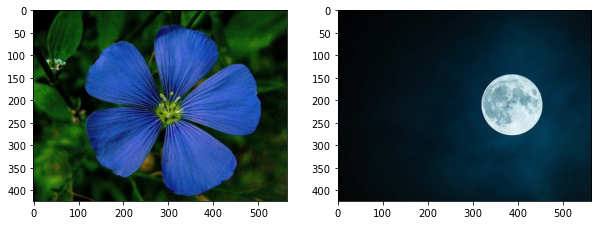

In [4]:
img_1 = imageio.imread('FlorAzul.png')[1:425,1:565,0:3]/255    #Se cargan las imagenes
img_2 = imageio.imread('Cielo2.png')[108:532,198:762,0:3]/255  #Se ajustan a la misma cant. de pixeles

fig, axes = plt.subplots(1, 2, figsize=(10,5))                 #Se muestran las imagenes originales
axes[0].imshow(img_1)
axes[1].imshow(img_2)

print(img_1.shape)                                             #Se muestra el tamaño de las imagenes
print(img_2.shape)

Text(0.5, 1.0, 'Resta Clampeada')

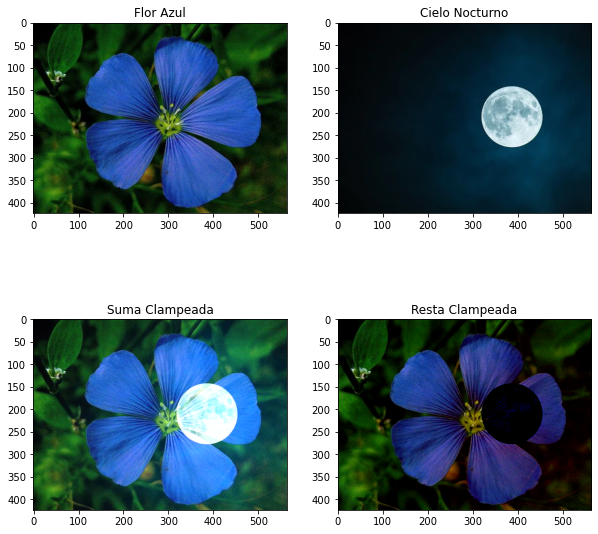

In [6]:
# Suma y Resta clampeadas

img_3 = img_1 + img_2                            #Se suman las imagenes
img_3 = np.clip(img_3, 0 , 1)                    #Luego se limitan los valores entre 0 y 1

img_4 = img_1 - img_2                            #Se restan las imagenes
img_4 = np.clip(img_4, 0 , 1)                    #Luego se limitan los valores entre 0 y 1


fig, axes = plt.subplots(2, 2, figsize=(10,10))  #Se muestrean los resultados
axes[0,0].imshow(img_1)
axes[0,0].set_title('Flor Azul')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Cielo Nocturno')
axes[1,0].imshow(img_3)
axes[1,0].set_title('Suma Clampeada')
axes[1,1].imshow(img_4)
axes[1,1].set_title('Resta Clampeada')


Text(0.5, 1.0, 'Resta Promediada')

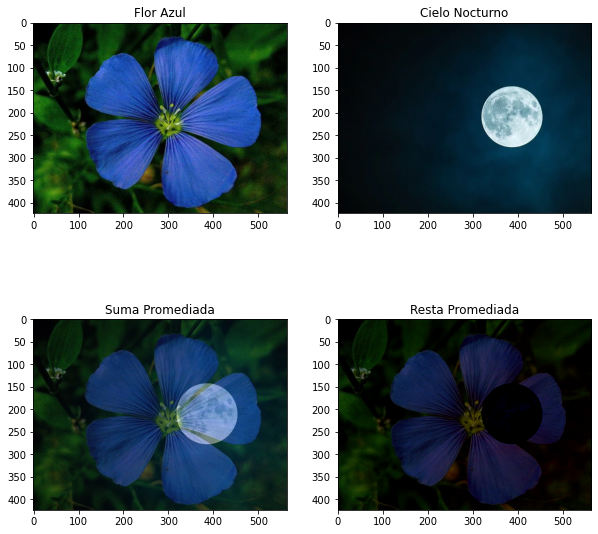

In [8]:
# Suma y Resta promediadas

img_3 = (img_1 + img_2)/2                        #Se suman las imagenes
img_3 = np.clip(img_3, 0 , 1)                    #Luego se limitan los valores entre 0 y 1 (a pesar de que el valor max es 1)

img_4= (img_1 - img_2)/2                         #Se restan las imagenes
img_4 = np.clip(img_4, 0 , 1)                    #Luego se limitan los valores entre 0 y 1 (a pesar de que el valor max es 1)

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].imshow(img_1)
axes[0,0].set_title('Flor Azul')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Cielo Nocturno')
axes[1,0].imshow(img_3)
axes[1,0].set_title('Suma Promediada')
axes[1,1].imshow(img_4)
axes[1,1].set_title('Resta Promediada')

Text(0.5, 1.0, 'Resta Promediada en YIQ')

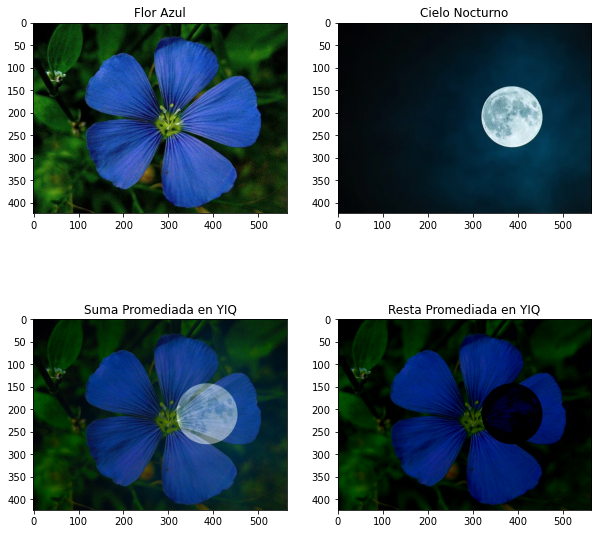

In [9]:
# Suma y Resta en YIQ

img_1_yiq = rgb2yiq(img_1)   #Se convierten las imagenes a YIQ y se dividen los canales
img_1_y = img_1_yiq[:,:,0]
img_1_i = img_1_yiq[:,:,1]
img_1_q = img_1_yiq[:,:,2]

img_2_yiq = rgb2yiq(img_2)
img_2_y = img_2_yiq[:,:,0]
img_2_i = img_2_yiq[:,:,1]
img_2_q = img_2_yiq[:,:,2]

#/////////////////////////
#Suma clampeada/promediada
#img_3_yiq_y = np.clip(img_1_y + img_2_y,0,1)   #Se utilizan la suma clampeada o promediada
img_3_yiq_y = (img_1_y + img_2_y)/2             # para determinar el canal Y
img_4_yiq_y = (img_1_y - img_2_y)/2
#////////////////////////
#Suma Interpolada
img_3_yiq_i = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y) #Luego se realiza la interpolacion 
img_3_yiq_q = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y) # dado el canal y como conocido
#////////////////////////

img_3_yiq = img_2_yiq

img_3_yiq[:,:,0] = img_3_yiq_y    # Se combinan los 3 canales en una sola matriz
img_3_yiq[:,:,1] = img_3_yiq_i
img_3_yiq[:,:,2] = img_3_yiq_q
    
img_3_rgb = yiq2rgb(img_3_yiq)    # Se vuelve a RGB

#Resta Interpolada
img_4_yiq_i = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y) #Exactamente lo mismo para la resta
img_4_yiq_q = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y)
#////////////////////////
img_4_yiq = img_2_yiq

img_4_yiq[:,:,0] = img_4_yiq_y    # Se combinan los 3 canales en una sola matriz nuevamente
img_4_yiq[:,:,1] = img_4_yiq_i
img_4_yiq[:,:,2] = img_4_yiq_q

img_4_rgb = yiq2rgb(img_4_yiq)    # Se vuelve a RGB

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].imshow(img_1)
axes[0,0].set_title('Flor Azul')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Cielo Nocturno')
axes[1,0].imshow(np.clip(img_3_rgb,0,1))
axes[1,0].set_title('Suma Promediada en YIQ')
axes[1,1].imshow(np.clip(img_4_rgb,0,1))
axes[1,1].set_title('Resta Promediada en YIQ')

In [11]:
#Definicion de las funciones iflighter and ifdarker

def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]   #Se toman los canales Y de cada imagen
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)     #Se crea una matriz vacia
    
    mask = img_1_y > img_2_y          #Si el canalY de la imagen1> que el de la imagen2
    img_3[mask] = img_1[mask]         #Se cargan los datos de la imagen1, y esto se analiza pixel por pixel
    
    mask = img_2_y >= img_1_y         #Si el canalY de la imagen2>= que el de la imagen1
    img_3[mask] = img_2[mask]         #Se cargan los datos de la imagen2
    
    return img_3                      #Se devuelve la imagen 3

def if_darker(img_1, img_2):          #Caso contrario para Ifdarker se invierten los >,< con respecto 
    img_1_y = rgb2yiq(img_1)[:,:,0]   # a la funcion Iflighter
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = img_1_y < img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y <= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3


Text(0.5, 1.0, 'Ifdarker')

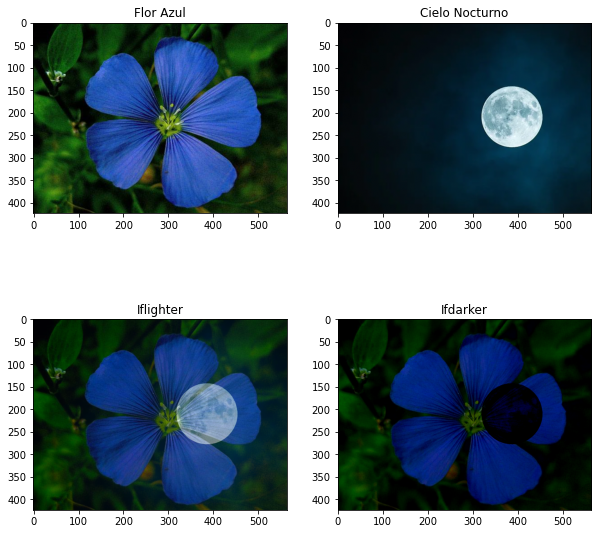

In [13]:
#Llamado a las funciones Iflighter e Ifdarker

img_3 = if_darker(img_1,img_2)
img_4 = if_lighter(img_1,img_2)

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].imshow(img_1)
axes[0,0].set_title('Flor Azul')
axes[0,1].imshow(img_2)
axes[0,1].set_title('Cielo Nocturno')
axes[1,0].imshow(np.clip(img_3_rgb,0,1))
axes[1,0].set_title('Iflighter')
axes[1,1].imshow(np.clip(img_4_rgb,0,1))
axes[1,1].set_title('Ifdarker')